In [1]:
import numpy as np

In [36]:
L=20 #we make a fcc structure with 0<=i,j,k<L
size_lattice = L**3
size_face_type = (L**3 -2*L**2 + L)
size_face = 3*size_face_type
total_size = size_lattice+size_face
lattice_moves = [[-2, 0,0], [2, 0, 0], [0, -2,0], [0, 2, 0], [0,0,-2], [0,0,2]]
face_moves= [[1, 1,0], [1,-1, 0], [-1, 1, 0], [-1, -1, 0], [1, 0, 1], [1, 0, -1], [-1, 0, 1], [-1, 0, -1], [0, 1,1], [0, 1, -1], [0, -1, 1], [0, -1, -1]]

nn_adjacency = np.zeros((total_size, total_size))

In [37]:
def lattice_to_index(i, j, k):
    return L**2*(i//2) + (j//2)*L + (k//2)
def index_to_lattice(index):
    #stipulate (index < L**3)
    k = index % L
    j = (index//L)%L
    i = (index//(L**2))
    return (2*i, 2*j, 2*k)
def face_to_index(i, j, k):
    if k%2 ==0:
        return L**3 + (k//2) + L*(j//2) + L*(L-1)*(i//2)
    if j%2==0:
        return L**3 + size_face_type + (k//2) + (L-1)*(j//2) + L*(L-1) *(i//2)
    if i%2 ==0:
        return L**3 + 2*size_face_type+ (k//2) + (L-1)*(j//2) + (L-1)*(L-1)*(i//2)
def any_to_index(i, j, k):
    if i%2==0 and j%2==0 and k%2 ==0:
        return lattice_to_index(i, j, k)
    else:
        return face_to_index(i, j, k)

In [66]:
for index in range(total_size):
    i, j, k = index_to_lattice(index)
    # for lm in lattice_moves:
    #     new_i = lm[0] +i
    #     new_j = lm[1] +j
    #     new_k = lm[2] +k
    #     if 0<=new_i< 2*L-1 and 0<= new_j<2*L-1 and 0<=new_k<2*L-1:
    #         secondary_index = lattice_to_index(new_i, new_j, new_k)
    #         nn_adjacency[index][secondary_index]=1
    #         nn_adjacency[secondary_index][index] =1
    for fm in face_moves:
        new_i = fm[0] +i
        new_j = fm[1] +j
        new_k = fm[2] +k
        if 0<=new_i< 2*L-1 and 0<= new_j<2*L-1 and 0<=new_k<2*L-1:
            secondary_index = face_to_index(new_i, new_j, new_k)
            nn_adjacency[index][secondary_index]=1
            nn_adjacency[secondary_index][index] =1
print(nn_adjacency)
        
    

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [64]:
sum(nn_adjacency[0])

np.float64(6.0)

In [55]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw

In [58]:
G=rx.PyGraph.from_adjacency_matrix(nn_adjacency)

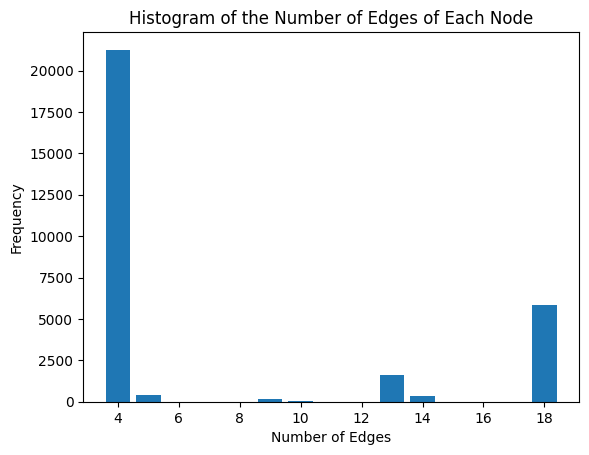

In [59]:
import matplotlib.pyplot as plt

# Get the degree of each node
degrees = [G.degree(node) for node in G.node_indices()]

# Plot the histogram
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')
plt.title('Histogram of the Number of Edges of Each Node')
plt.show()